--- Dimensionality Reduction Results ---
Original features: 30
PCA Total Variance Explained by 2 components: 63.24%
LDA Number of effective components (max class separation): 1



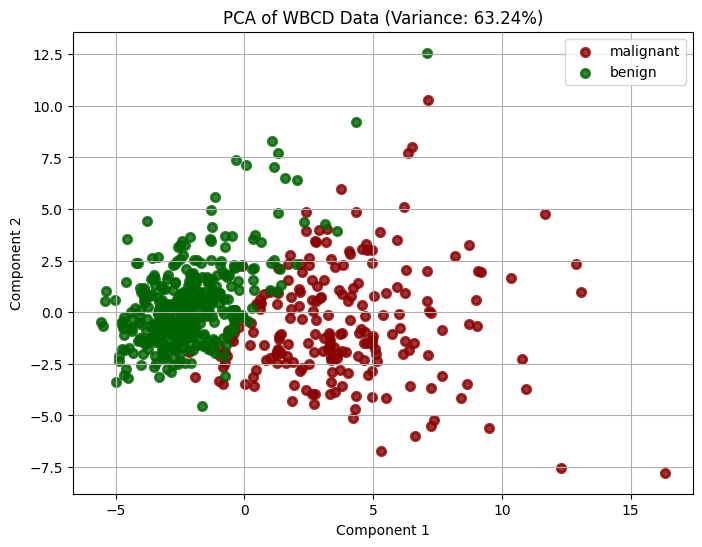

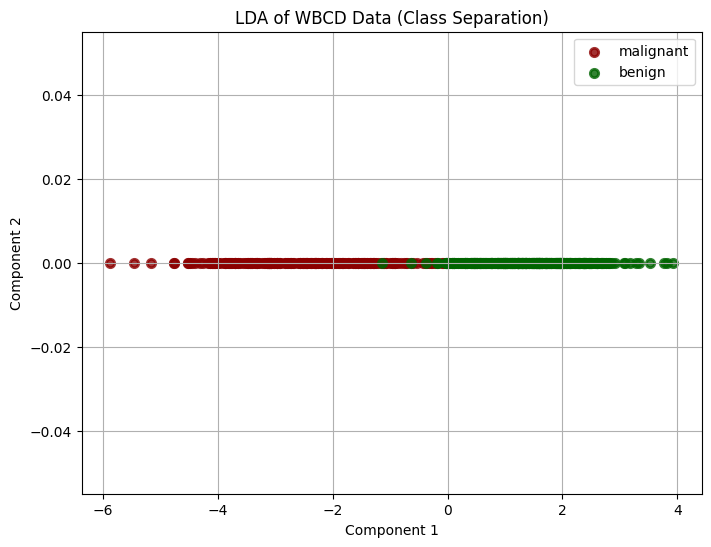

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
target_names = cancer.target_names

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

lda = LinearDiscriminantAnalysis(n_components=1)
X_lda_1d = lda.fit_transform(X_scaled, y)
X_lda = np.hstack([X_lda_1d, np.zeros((X_lda_1d.shape[0], 1))])

print("--- Dimensionality Reduction Results ---")
print(f"Original features: {X.shape[1]}")
print(f"PCA Total Variance Explained by 2 components: {pca.explained_variance_ratio_.sum()*100:.2f}%")
print(f"LDA Number of effective components (max class separation): {lda.n_components}\n")

def plot_reduction(X_reduced, title, target, target_names):
    plt.figure(figsize=(8, 6))
    colors = ['darkred', 'darkgreen']
    lw = 2

    for color, i, target_name in zip(colors, [0, 1], target_names):
        plt.scatter(
            X_reduced[target == i, 0],
            X_reduced[target == i, 1],
            color=color,
            alpha=0.8,
            lw=lw,
            label=target_name
        )

    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

plot_reduction(
    X_reduced=X_pca,
    title=f'PCA of WBCD Data (Variance: {pca.explained_variance_ratio_.sum()*100:.2f}%)',
    target=y,
    target_names=target_names
)

plot_reduction(
    X_reduced=X_lda,
    title='LDA of WBCD Data (Class Separation)',
    target=y,
    target_names=target_names
)
